In [39]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt


import warnings
 
warnings.filterwarnings("ignore")

In [106]:

def read_data_from_files(root_folder):
    # 定义需要提取的字段映射
    field_mapping = {
        'GROWTH_DAY': '日龄',
        'HISTORY_TIME': '时间',
        'TARGET_TEMP': '目标温度',
        'HOUSE_TEMP_MIN': '鸡舍温度-最低',
        'HOUSE_TEMP_AVG': '鸡舍温度-平均',
        'HOUSE_TEMP_MAX': '鸡舍温度-最高',
        'TEMP_1_AVG': '温度1-平均',
        'TEMP_2_AVG': '温度2-平均',
        'TEMP_3_AVG': '温度3-平均',
        'TEMP_4_AVG': '温度4-平均',
        'TEMP_5_AVG': '温度5-平均',
        'TEMP_6_AVG': '温度6-平均',
        'OUTSIDE_AVG': '外部-平均',
        'HUMIDITY_IN_1_AVG': 'Humidity In 1 Avg',
        'HUMIDITY_OUT_AVG': '湿度-外部-平均',
        'WATER_CON': '水',
        'FEED_CON': '饲料',
        'LEVEL': '水平'
    }

    # 定义最终需要的字段
    final_fields = [
        '日龄', '时间', '目标温度', '鸡舍温度-最低', '鸡舍温度-平均',
        '鸡舍温度-最高', '温度1-平均', '温度2-平均', '温度3-平均',
        '温度4-平均', '温度5-平均', '温度6-平均', '外部-平均',
        'Humidity In 1 Avg', '湿度-外部-平均', '水', '饲料', '水平',
        'id_no', 'house_no'
    ]

    # 用于存储所有符合条件的数据
    all_data = pd.DataFrame()

    # 遍历根文件夹及其子文件夹
    for root, dirs, files in os.walk(root_folder):
        # 筛选以 G 开头的鸡场文件夹
        if root.split(os.sep)[-1].startswith('G'):
            id_no = root.split(os.sep)[-1]

            # 处理 .xls 文件
            for file in files:
                if file.endswith('.xls'):
                    try:
                        # 提取鸡舍名称
                        house_no = file.split('H')[-1].split('.')[0]
                        # 读取文件
                        df = pd.read_excel(os.path.join(root, file))
                        # 重命名列名
                        df.rename(columns=field_mapping, inplace=True)
                        # 添加鸡场和鸡舍名称字段
                        df['id_no'] = id_no
                        df['house_no'] = house_no
                        print(id_no,house_no)
                        all_data=pd.concat([all_data,df])
                    except Exception as e:
                        print(f"读取 {os.path.join(root, file)} 时出错: {e}")

            # 查找并处理 "EXCEL_Files" 文件夹
            for sub_root, sub_dirs, sub_files in os.walk(root):
                for file in sub_files:
                    if file.endswith('.xlsx') and 'H' in file:
                        try:
                            # 提取鸡舍名称
                            house_no = file.split('H')[-1].split('-')[0]
                            # 读取指定工作表
                            df = pd.read_excel(os.path.join(sub_root, file), sheet_name='History View')
                            # 添加鸡场和鸡舍名称字段
                            df['id_no'] = id_no
                            df['house_no'] = house_no
                            # print(id_no,house_no)
                            all_data=pd.concat([all_data,df])
                        except Exception as e:
                            print(f"读取 {os.path.join(sub_root, file)} 时出错: {e}")
    
    
    all_data = all_data.reindex(columns=final_fields)
    # 合并所有数据
    # if all_data:
    #     # merged_df = pd.concat(all_data, ignore_index=True)
    #     # 确保最终的 DataFrame 包含所有需要的字段
    #     all_data = all_data.reindex(columns=final_fields)
    #     # # 保存合并后的数据到一个新的 Excel 文件
    #     # merged_df.to_excel('merged_result.xlsx', index=False)
    #     # print('数据合并完成，结果已保存到 merged_result.xlsx')
    # else:
    #     print('未找到符合条件的数据')
    
    return all_data

In [ ]:

def read_data_from_files(root_folder):
    # 定义需要提取的字段映射
    field_mapping = {
        'GROWTH_DAY': '日龄',
        'HISTORY_TIME': '时间',
        'TARGET_TEMP': '目标温度',
        'HOUSE_TEMP_MIN': '鸡舍温度-最低',
        'HOUSE_TEMP_AVG': '鸡舍温度-平均',
        'HOUSE_TEMP_MAX': '鸡舍温度-最高',
        'TEMP_1_AVG': '温度1-平均',
        'TEMP_2_AVG': '温度2-平均',
        'TEMP_3_AVG': '温度3-平均',
        'TEMP_4_AVG': '温度4-平均',
        'TEMP_5_AVG': '温度5-平均',
        'TEMP_6_AVG': '温度6-平均',
        'OUTSIDE_AVG': '外部-平均',
        'HUMIDITY_IN_1_AVG': 'Humidity In 1 Avg',
        'HUMIDITY_OUT_AVG': '湿度-外部-平均',
        'WATER_CON': '水',
        'FEED_CON': '饲料',
        'LEVEL': '水平'
    }

    # 定义最终需要的字段
    final_fields = [
        '日龄', '时间', '目标温度', '鸡舍温度-最低', '鸡舍温度-平均',
        '鸡舍温度-最高', '温度1-平均', '温度2-平均', '温度3-平均',
        '温度4-平均', '温度5-平均', '温度6-平均', '外部-平均',
        'Humidity In 1 Avg', '湿度-外部-平均', '水', '饲料', '水平',
        'id_no', 'house_no'
    ]

    # 用于存储所有符合条件的数据
    all_data = pd.DataFrame()

    # 遍历最外层文件夹
    # root_folder = 'your_folder_path'  # 请替换为实际的文件夹路径
    for farm_folder in os.listdir(root_folder):
        if farm_folder.startswith('G'):
            farm_path = os.path.join(root_folder, farm_folder)
            id_no = farm_folder

            # 处理包含xls文件的情况
            for file in os.listdir(farm_path):
                if file.endswith('.xls') and 'H' in file:
                    file_path = os.path.join(farm_path, file)
                    # 提取鸡舍名称
                    house_no = os.path.splitext(file)[0].split('H')[-1]
                    house_no = 'H' + house_no
                    df = pd.read_excel(file_path)
                    df['id_no'] = id_no
                    df['house_no'] = house_no
                    all_data.append(df)


            # 处理包含“EXCEL_Files”文件夹的情况
            excel_files_folder = os.path.join(farm_path, 'EXCEL_Files')
            if os.path.exists(excel_files_folder):
                for file in os.listdir(excel_files_folder):
                    if file.endswith('.xlsx') and file.startswith('H'):
                        file_path = os.path.join(excel_files_folder, file)
                        # 提取鸡舍名称
                        house_no = file.split('-')[0]
                        # 读取指定工作表中的数据
                        df = pd.read_excel(file_path, sheet_name='History View')
                        # 重命名列
                        df = df.rename(columns=field_mapping)
                        df['id_no'] = id_no
                        df['house_no'] = house_no
                        all_data=pd.concat([all_data,df])
    # return all_data

    # 合并所有数据
    if all_data:
        # merged_df = pd.concat(all_data, ignore_index=True)
        # 确保最终的 DataFrame 包含所有需要的字段
        merged_df = merged_df.reindex(columns=final_fields)
        # # 保存合并后的数据到一个新的 Excel 文件
        # merged_df.to_excel('merged_result.xlsx', index=False)
        # print('数据合并完成，结果已保存到 merged_result.xlsx')
    else:
        print('未找到符合条件的数据')
    
    return merged_df

In [107]:
root_folder='c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\24.12 2\\环控数据'
merge_df1=read_data_from_files(root_folder)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G01-62 g01-h1
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G01-62 g01-h10
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G01-62 g01-h11
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G01-62 g01-h12
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G01-62 g01-h13
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G01-62 g01-h14
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G01-62 g01-h15
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G01-62 g01-h16
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G01-62 g01-h17
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G01-62 g01-h18
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G01-62 g01-h19
WARNING *** OLE2 inconsistency: S

In [104]:
root_folder='c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.01\\环控数据'
merge_df2=read_data_from_files(root_folder)

读取 c:\FILES_202305\202504养鸡项目\chickenfarming\data\25.01\环控数据\G02-61\鸡群_7House_H1-L4（46）.xlsx 时出错: [Errno 2] No such file or directory: 'c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.01\\环控数据\\G02-61\\鸡群_7House_H1-L4（46）.xlsx'
读取 c:\FILES_202305\202504养鸡项目\chickenfarming\data\25.01\环控数据\G02-61\鸡群_4House_H10-L6（42）.xlsx 时出错: [Errno 2] No such file or directory: 'c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.01\\环控数据\\G02-61\\鸡群_4House_H10-L6（42）.xlsx'
读取 c:\FILES_202305\202504养鸡项目\chickenfarming\data\25.01\环控数据\G02-61\鸡群_61House_H8-L6（42）.xlsx 时出错: [Errno 2] No such file or directory: 'c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.01\\环控数据\\G02-61\\鸡群_61House_H8-L6（42）.xlsx'
读取 c:\FILES_202305\202504养鸡项目\chickenfarming\data\25.01\环控数据\G02-61\鸡群_61House_H9-L6（42）.xlsx 时出错: [Errno 2] No such file or directory: 'c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.01\\环控数据\\G02-61\\鸡群_61House_H9-L6（42）.xlsx'
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSA

In [105]:
root_folder='c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.02\\环控数据-2502\\环控数据-2502'
merge_df3=read_data_from_files(root_folder)

读取 c:\FILES_202305\202504养鸡项目\chickenfarming\data\25.02\环控数据-2502\环控数据-2502\G01-63\鸡群_64House_H1-L6.xlsx 时出错: [Errno 2] No such file or directory: 'c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.02\\环控数据-2502\\环控数据-2502\\G01-63\\鸡群_64House_H1-L6.xlsx'
读取 c:\FILES_202305\202504养鸡项目\chickenfarming\data\25.02\环控数据-2502\环控数据-2502\G01-63\鸡群_63House_H10-L4.xlsx 时出错: [Errno 2] No such file or directory: 'c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.02\\环控数据-2502\\环控数据-2502\\G01-63\\鸡群_63House_H10-L4.xlsx'
读取 c:\FILES_202305\202504养鸡项目\chickenfarming\data\25.02\环控数据-2502\环控数据-2502\G01-63\鸡群_63House_H11-L7.xlsx 时出错: [Errno 2] No such file or directory: 'c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.02\\环控数据-2502\\环控数据-2502\\G01-63\\鸡群_63House_H11-L7.xlsx'
读取 c:\FILES_202305\202504养鸡项目\chickenfarming\data\25.02\环控数据-2502\环控数据-2502\G01-63\鸡群_12House_H12-L4.xlsx 时出错: [Errno 2] No such file or directory: 'c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.02\\环控数据-250

In [95]:
root_folder='c:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\25.03\\2503-环控'
merge_df4=read_data_from_files(root_folder)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G06-66 10历史数据
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G06-66 11历史数据
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G06-66 12历史数据
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G06-66 13历史数据
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G06-66 14历史数据
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G06-66 15历史数据
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G06-66 16历史数据
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G06-66 17历史数据
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G06-66 18历史数据
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G06-66 19历史数据
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
G06-66 1历史数据
WARNING *** OLE2 inconsistency: SSCS size is

In [96]:
all_HumTem_data=pd.concat([merge_df1,merge_df2,merge_df3,merge_df4])
all_HumTem_data=all_HumTem_data.reset_index(drop=True)

In [97]:
all_HumTem_data['house_no']=all_HumTem_data['house_no'].map(lambda x:re.sub(r'[\u4e00-\u9fa5]', '', x))
all_HumTem_data['house_no']=all_HumTem_data['house_no'].map(lambda x :x.split('-')[0])
all_HumTem_data['id_no']=all_HumTem_data['id_no'].str[1:]
all_HumTem_data['id_no']=all_HumTem_data['id_no'].str.replace('-','_')

In [98]:
all_HumTem_data=all_HumTem_data.drop_duplicates()

In [99]:
all_HumTem_data['id_no'].unique()

array(['01_62', '03_66', '04_50', '07_64', '08_65', '09_65', '10_62',
       '17_67', '31_62', '32_62', 'TF_71', '06_65', '12_67', '13_67',
       '14_65', '15_64', '16_52', '30_65', '31_64', '32_63', 'TF_72',
       '03_67', '04_51', '07_65', '08_66', '09_66', '10_63', '17_68',
       '23_28', '06_66', '09_67', '12_68', '13_68', '14_66', '15_65',
       '16_53', '30_66', '31_65', '32_64', 'TF_73'], dtype=object)

In [100]:
len(all_HumTem_data['id_no'].unique())

40

In [101]:
all_HumTem_data[all_HumTem_data['id_no']=='11-71']

,日龄,时间,目标温度,鸡舍温度-最低,鸡舍温度-平均,鸡舍温度-最高,温度1-平均,温度2-平均,温度3-平均,温度4-平均,温度5-平均,温度6-平均,外部-平均,Humidity In 1 Avg,湿度-外部-平均,水,饲料,水平,id_no,house_no


In [28]:
all_HumTem_data.to_csv('C:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\data_cleaned\\all_HumTem_data_fromHKdata.csv',index=False)

In [70]:
data=all_HumTem_data.copy()
# 需要转换为数值类型的字段
numeric_columns = [
    '鸡舍温度-最低', '鸡舍温度-平均', '鸡舍温度-最高',
    '温度1-平均', '温度2-平均', '温度3-平均',
    '温度4-平均', '温度5-平均', '温度6-平均',
    '外部-平均', 'Humidity In 1 Avg', '湿度-外部-平均',
    '水', '饲料', '水平'
]

# 将需要统计的字段转换为数值类型
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
# 将日龄列转换为数值类型
data['日龄'] = pd.to_numeric(data['日龄'], errors='coerce')


# 定义温度相关列
temp_cols = [f'温度{i}-平均' for i in range(1, 7)]

# 按 house_no、id_no 和日龄分组
grouped = data.groupby(['house_no', 'id_no', '日龄'])

# 统计每个分组内的最高温度、最低温度、平均温度以及 Humidity In 1 Avg 的最值和均值
agg_result = grouped.agg({
    **{col: ['max', 'min', 'mean'] for col in temp_cols},
    'Humidity In 1 Avg': ['max', 'min', 'mean']
})

# 重新设置列名
agg_result.columns = ['_'.join(col).strip() for col in agg_result.columns.values]

# 计算每个日龄所有时间的最高温度（温度 1 - 平均到温度 6 - 平均的最高值）
agg_result['最高温度'] = agg_result[[f'{col}_max' for col in temp_cols]].max(axis=1)
# 计算每个日龄所有时间的最低温度（温度 1 - 平均到温度 6 - 平均的最低值）
agg_result['最低温度'] = agg_result[[f'{col}_min' for col in temp_cols]].min(axis=1)
# 计算每个日龄所有时间的平均温度（温度 1 - 平均到温度 6 - 平均的平均值）
agg_result['平均温度'] = agg_result[[f'{col}_mean' for col in temp_cols]].mean(axis=1)

# 计算每日温差
agg_result['每日温差'] = agg_result['最高温度'] - agg_result['最低温度']

# 重命名 Humidity In 1 Avg 的统计结果列
agg_result = agg_result.rename(columns={
    'Humidity In 1 Avg_max': 'Humidity In 1 Avg 最高值',
    'Humidity In 1 Avg_min': 'Humidity In 1 Avg 最低值',
    'Humidity In 1 Avg_mean': 'Humidity In 1 Avg 平均值'
})

# 计算每个日龄每个时间的最高温度（温度 1 - 平均到温度 6 - 平均的最高值）
data['最高温度'] = data[temp_cols].max(axis=1)
# 计算每个日龄每个时间的最低温度（温度 1 - 平均到温度 6 - 平均的最低值）
data['最低温度'] = data[temp_cols].min(axis=1)
# 计算每个日龄每个时间的平均温度（温度 1 - 平均到温度 6 - 平均的平均值）
data['平均温度'] = data[temp_cols].mean(axis=1)
grouped2 = data.sort_values(by=['house_no', 'id_no', '日龄','时间'])

# 定义计算变化率的函数
def calculate_change_rate(series):
    return series.pct_change()


# 计算平均温度、最高温度和最低温度的变化率
grouped2['平均温度变化率'] = grouped2.groupby(['house_no', 'id_no', '日龄'])['平均温度'].apply(calculate_change_rate)
grouped2['最高温度变化率'] = grouped2.groupby(['house_no', 'id_no', '日龄'])['最高温度'].apply(calculate_change_rate)
grouped2['最低温度变化率'] = grouped2.groupby(['house_no', 'id_no', '日龄'])['最低温度'].apply(calculate_change_rate)

agg_result2=grouped2.groupby(['house_no', 'id_no', '日龄'])[['平均温度变化率','最高温度变化率','最低温度变化率']].mean()

agg_result['平均温度变化率']=agg_result2['平均温度变化率']
agg_result['最高温度变化率']=agg_result2['最高温度变化率']
agg_result['最低温度变化率']=agg_result2['最低温度变化率']
agg_result=agg_result.reset_index()


In [71]:
# 选择需要的字段
selected_columns = ['house_no', 'id_no', '日龄', '最高温度', '最低温度', '平均温度', '每日温差',
                    'Humidity In 1 Avg 最高值', 'Humidity In 1 Avg 最低值', 'Humidity In 1 Avg 平均值',
                    '最高温度变化率', '最低温度变化率', '平均温度变化率']
aggregated = agg_result[selected_columns]

# 字段名映射
field_mapping = {
    'id_no': 'id_no',
    'house_no': 'HouseNo',
    '日龄': 'Age',
    '最高温度': 'MaxTemperature',
    '最低温度': 'MinTemperature',
    '平均温度': 'AvgTemperature',
    '每日温差': 'DailyTemperatureDifference',
    'Humidity In 1 Avg 平均值': 'AvgHumidityIn1',
    'Humidity In 1 Avg 最高值': 'MaxHumidityIn1',
    'Humidity In 1 Avg 最低值': 'MinHumidityIn1',
    '最高温度变化率': 'MaxTemperatureChangeRate',
    '最低温度变化率': 'MinTemperatureChangeRate',
    '平均温度变化率': 'AvgTemperatureChangeRate'
}

# 重命名列
aggregated = aggregated.rename(columns=field_mapping)
aggregated['ID_NUM']='G'+aggregated['id_no']+"_"+aggregated['HouseNo']

aggregated.drop(columns=['id_no','HouseNo'],axis=1,inplace=True)

In [72]:
aggregated

,Age,MaxTemperature,MinTemperature,AvgTemperature,DailyTemperatureDifference,MaxHumidityIn1,MinHumidityIn1,AvgHumidityIn1,MaxTemperatureChangeRate,MinTemperatureChangeRate,AvgTemperatureChangeRate,ID_NUM
0,-1.0,35.1,7.3,29.311111,27.8,95.0,50.0,64.458333,0.001390,0.065865,0.002755,G03_66_1
1,0.0,35.6,2.8,28.728472,32.8,62.6,50.9,57.258333,0.000283,0.029697,0.000619,G03_66_1
2,1.0,35.3,3.7,28.897222,31.6,64.0,59.6,62.325000,0.000505,0.022570,0.000259,G03_66_1
3,2.0,34.6,6.2,27.881250,28.4,69.2,60.9,66.195833,0.000794,0.012047,0.000735,G03_66_1
4,3.0,33.8,3.1,27.170833,30.7,66.9,56.9,62.537500,-0.000963,0.006578,-0.000989,G03_66_1
...,...,...,...,...,...,...,...,...,...,...,...,...
20304,36.0,27.0,-0.8,18.292396,27.8,95.0,42.0,69.773246,0.028050,inf,0.030816,G01_62_g01
20305,37.0,25.5,-2.6,17.096979,28.1,95.0,41.6,70.344518,0.042027,NaN,0.053312,G01_62_g01
20306,38.0,23.7,-3.9,10.146413,27.6,95.0,1.0,59.339773,-0.052731,NaN,0.750097,G01_62_g01
20307,39.0,14.9,-3.7,4.872599,18.6,84.0,3.0,56.167284,0.941967,NaN,-0.997973,G01_62_g01


<AxesSubplot:xlabel='Age'>

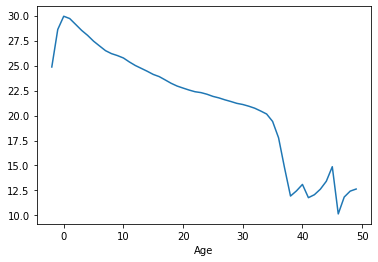

In [73]:
aggregated.groupby(['Age'])['AvgTemperature'].mean().plot()

In [82]:
aggregated.groupby(['Age'])['AvgTemperature'].mean().tail(20)

Age
30    21.108197
31    20.940182
32    20.742099
33    20.463664
34    20.163875
35    19.417825
36    17.775270
37    14.765235
38    11.955342
39    12.530598
40    13.222847
41    11.779229
42    12.074778
43    12.627428
44    13.422643
45    14.878472
46    10.153472
47    11.842361
48    12.434722
49    12.645000
Name: AvgTemperature, dtype: float64

In [ ]:
# 删除37天以后的数据
# aggregated=aggregated[(aggregated['Age']<=36) ]

In [83]:
aggregated.to_csv('C:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\data_cleaned\\HumTem_data_agg.csv',index=False)

In [74]:
import os

root_dir = "C:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data"
all_folder_names = []

for dirpath, dirnames, filenames in os.walk(root_dir):
    all_folder_names.extend(dirnames)  # 直接添加子文件夹名称

# 去重（如果有同名文件夹在不同路径下）
all_folder_names = list(set(all_folder_names))
G_folders=[i.replace('-','_') for i in all_folder_names if i.startswith('G')]

print(G_folders)

['G27_24', 'G08_66', 'G11_71', 'G27_25', 'G32_63', 'G01_62', 'G28', 'G12_67', 'G17_68', 'G13_68', 'G31_65', 'G31_64', 'G03_66', 'G09_66', 'G31_62', 'GTF_71', 'G16_53', 'G32_64', 'G04_50', 'G03_67', 'G30_66', 'G02_61', 'G28_25', 'G17_67', 'G14_66', 'G04_51', 'G14_65', 'G16_52', 'GTF_72', 'G01_63', 'G07_65', 'G06_66', 'G23_27', 'G30_65', 'G23_28', 'G13_67', 'G08_65', 'G32_62', 'G21_62', 'G12_68', 'G09_65', 'GTF_73', 'G15_64', 'G02_62', 'G15_65', 'G28_24', 'G10_62', 'G06_65', 'G09_67', 'G11_70', 'G21_61', 'G10_63', 'G07_64']


In [75]:
list2=list(aggregated['ID_NUM'].str[:6].drop_duplicates())

In [76]:
len(G_folders)

53

In [77]:
len(list2)

40

In [78]:
[i for i in G_folders if i not in list2]

['G27_24',
 'G11_71',
 'G27_25',
 'G28',
 'G02_61',
 'G28_25',
 'G01_63',
 'G23_27',
 'G21_62',
 'G02_62',
 'G28_24',
 'G11_70',
 'G21_61']